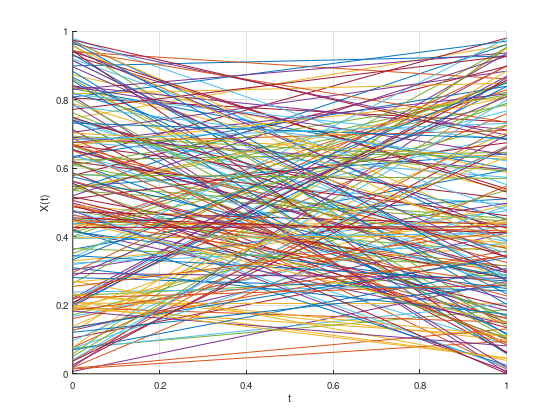

In [1]:
N = 100000;

dt = 0.05; t = 0 : dt : 1;
dx = 0.02; x = -0.2 : dx : 1.2;

X = zeros(N, length(t));

for i = 1 : N
  A = rand();
  B = rand();
  
  X(i, :) = (B-A)*t + A;
end

figure; hold on; grid on;
plot(t,X(1:200, :));
xlabel('t'); ylabel('X(t)');

pdfX_sim = hist(X,x) / (N*dx);
pdfX_teo = zeros(length(x), length(t));
for j = 1 : length(t)
  ts = min([t(j), 1-t(j)]) + 1e-10;
  pdfX_teo(:, j) = 1 / (ts * (1-ts)) * (...
    x .* (0 <= x & x < ts) + ...
    ts .* (ts <= x & x <= 1-ts) + ...
    (1 - x) .* (1 - ts <= x & x <= 1)
  );
end

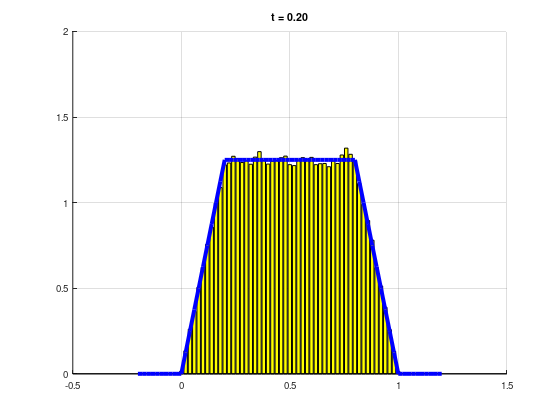

In [2]:
while 1
  for j = 1 : length(t)
     grid on; hold on;
     bar(x, pdfX_sim(:, j), 'y');
     plot(x, pdfX_teo(:,j), 'b', 'LineWidth', 4);
     hold off;
     ylim([0, 2]); ylim([0, 2]);
     title(sprintf("t = %.2f", t(j)));
     xlabel('x'); ylabel('f_{X(t)}(x)');
     pause(0.05)
     clf;
  end
end

# fdsfsdf